In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
df = pd.read_csv("C:/Users/ganes/Downloads/household_power_consumption.txt",delimiter=';')
df.head()

C:\Users\ganes\AppData\Local\Temp\ipykernel_15480\833650438.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/ganes/Downloads/household_power_consumption.txt",delimiter=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [217]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [219]:
df.dropna(subset = ['Sub_metering_3'], inplace = True)
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] = df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


In [221]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 156.3+ MB


In [223]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,2006,16
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,2006,16
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,2006,16
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,2006,16
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,2006,16


In [225]:
df['Hour'] = pd.to_datetime(df['Time'], format = '%H:%M:%S').dt.hour
df['Minute'] = pd.to_datetime(df['Time'], format = '%H:%M:%S').dt.minute
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hour,Minute
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,2006,16,17,24
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,2006,16,17,25
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,2006,16,17,26
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,2006,16,17,27
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,2006,16,17,28


In [226]:
df.drop(['Date'], axis = 1, inplace = True)
df.drop(['Time'], axis = 1, inplace = True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hour,Minute
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,2006,16,17,24
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,2006,16,17,25
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,2006,16,17,26
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,2006,16,17,27
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,2006,16,17,28


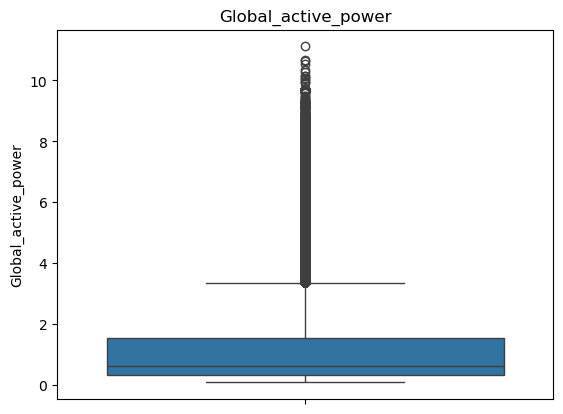

In [227]:
sns.boxplot(y=df['Global_active_power'])
plt.title('Global_active_power')
plt.show()

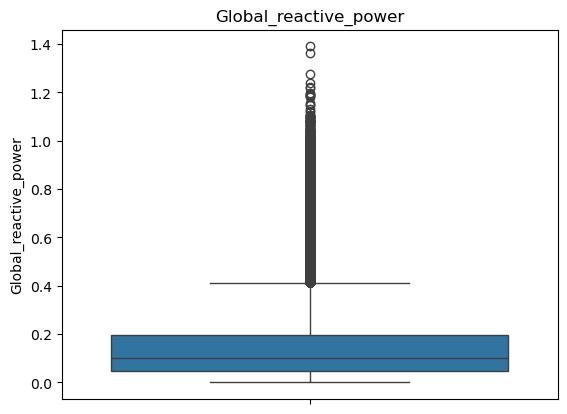

In [228]:
sns.boxplot(y=df['Global_reactive_power'])
plt.title('Global_reactive_power')
plt.show()

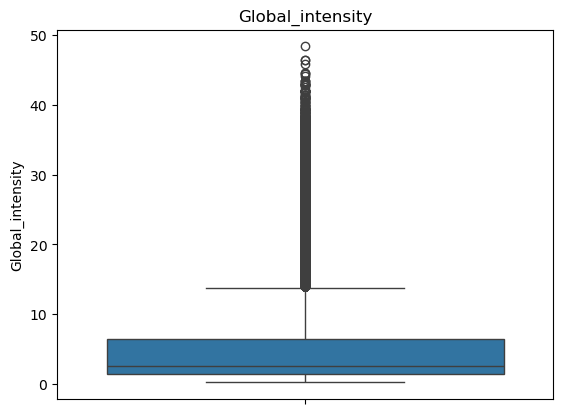

In [229]:
sns.boxplot(y=df['Global_intensity'])
plt.title('Global_intensity')
plt.show()

C:\Users\ganes\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


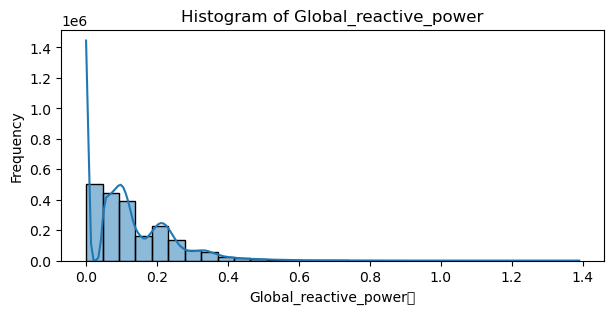

In [230]:
plt.figure(figsize = (7, 3))
sns.histplot(df['Global_reactive_power'], bins = 30, kde = True)
plt.title('Histogram of Global_reactive_power')
plt.xlabel('Global_reactive_power	')
plt.ylabel('Frequency')
plt.show()

Year
2006    1.901295
2007    1.117008
2008    1.072097
2009    1.078637
2010    1.061000
Name: Global_active_power, dtype: float64


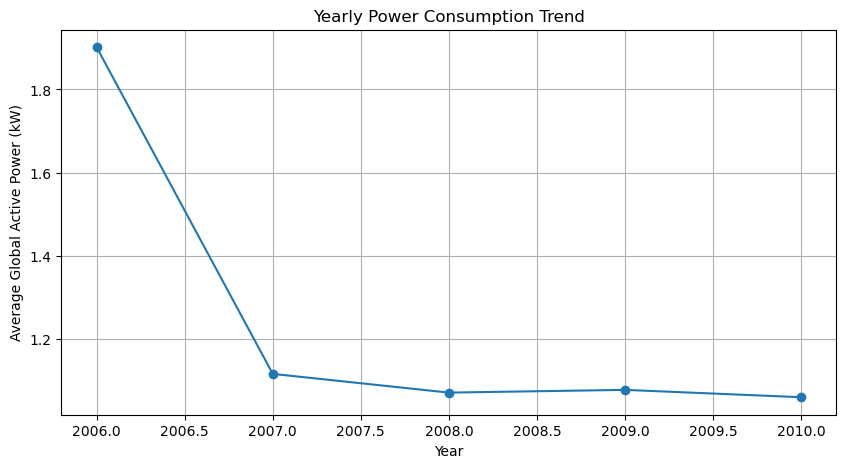

In [231]:
yearly_trend = df.groupby(df["Year"])["Global_active_power"].mean()
print (yearly_trend)
plt.figure(figsize=(10,5))
yearly_trend.plot(kind="line", marker="o", title="Yearly Power Consumption Trend")
plt.xlabel("Year")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

Month
1     1.462226
2     1.300431
3     1.231343
4     1.047146
5     1.029571
6     0.909148
7     0.700359
8     0.572812
9     0.975653
10    1.137141
11    1.291532
12    1.489729
Name: Global_active_power, dtype: float64


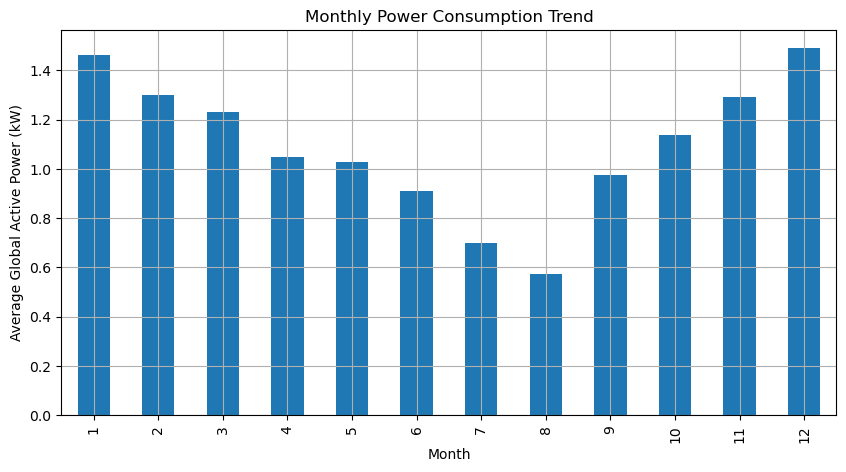

In [234]:
monthly_trend = df.groupby(df["Month"])["Global_active_power"].mean()
print (monthly_trend)
plt.figure(figsize=(10,5))
monthly_trend.plot(kind="bar", title="Monthly Power Consumption Trend")
plt.xlabel("Month")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

Day
1     1.038014
2     1.004372
3     1.005270
4     1.139491
5     1.118335
6     1.078531
7     1.082878
8     1.151886
9     1.067897
10    1.111325
11    1.129115
12    1.100360
13    1.100543
14    1.126912
15    1.111494
16    1.112290
17    1.125186
18    1.132064
19    1.064111
20    1.130728
21    1.116380
22    1.117536
23    1.121510
24    1.139655
25    1.055382
26    0.960737
27    1.067006
28    1.037298
29    1.067338
30    1.071120
31    1.187931
Name: Global_active_power, dtype: float64


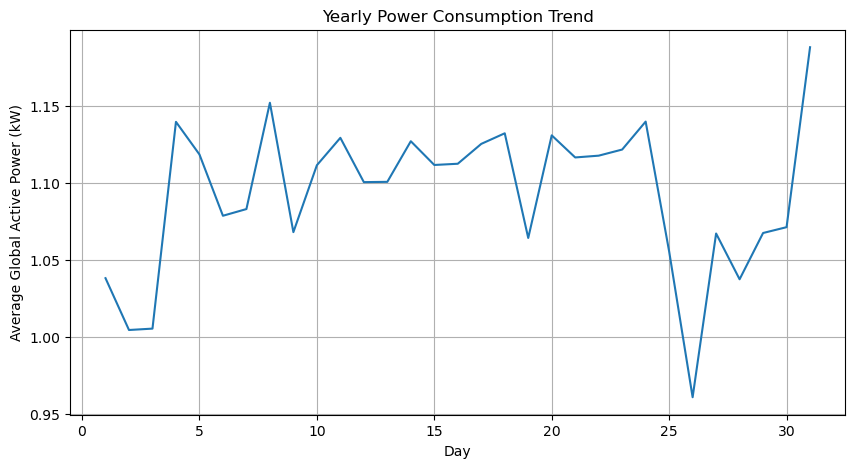

In [238]:
daily_trend = df.groupby(df["Day"])["Global_active_power"].mean()
print (daily_trend)
plt.figure(figsize=(10,5))
daily_trend.plot(kind="line", title="Yearly Power Consumption Trend")
plt.xlabel("Day")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

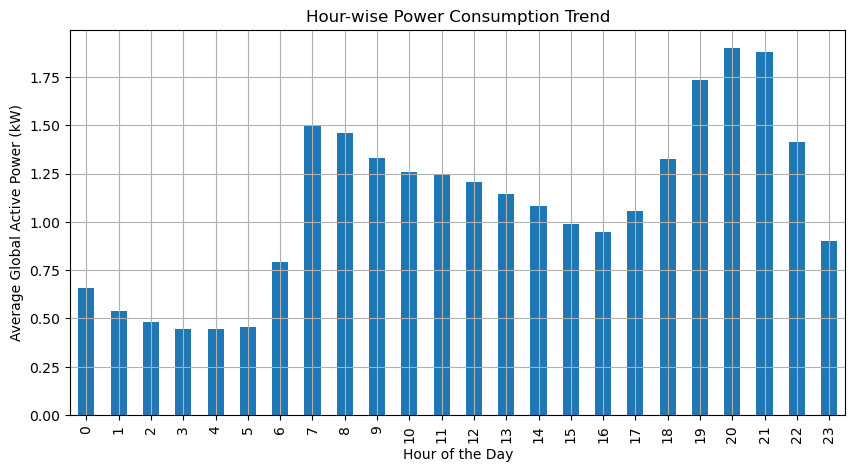

In [239]:
hourly_trend = df.groupby(df["Hour"])["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10, 5))
hourly_trend.plot(kind="bar", title="Hour-wise Power Consumption Trend")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()


In [245]:
rolling_average = (df.groupby(df["Day"])["Global_active_power"].apply(lambda x: x.rolling(window=2, min_periods=1).mean()))
df["rolling_average"] = rolling_average.reset_index(drop=True)

In [247]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hour,Minute,rolling_average
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,2006,16,17,24,2.580
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,2006,16,17,25,2.566
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,2006,16,17,26,2.551
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,2006,16,17,27,2.550
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,2006,16,17,28,2.552
